# Research question 3 - topic detection preprocessing

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Styles" data-toc-modified-id="Styles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Styles</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read data</a></span></li></ul></li><li><span><a href="#Review-word-count-analysis" data-toc-modified-id="Review-word-count-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Review word count analysis</a></span><ul class="toc-item"><li><span><a href="#Plot-distribution-of-reviews-word-count" data-toc-modified-id="Plot-distribution-of-reviews-word-count-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Plot distribution of reviews word count</a></span></li><li><span><a href="#Bin-'review_word_count'-into-three-discrete-set-of-labels:-'Short',-'Medium'-and-'Long'" data-toc-modified-id="Bin-'review_word_count'-into-three-discrete-set-of-labels:-'Short',-'Medium'-and-'Long'-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bin 'review_word_count' into three discrete set of labels: 'Short', 'Medium' and 'Long'</a></span></li><li><span><a href="#Plot-mean-review-word-count-by-year" data-toc-modified-id="Plot-mean-review-word-count-by-year-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot mean review word count by year</a></span></li><li><span><a href="#Plot-mean-review-word-count-by-city" data-toc-modified-id="Plot-mean-review-word-count-by-city-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot mean review word count by city</a></span></li><li><span><a href="#Plot-mean-review-count-by-year-and-city" data-toc-modified-id="Plot-mean-review-count-by-year-and-city-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot mean review count by year and city</a></span></li></ul></li><li><span><a href="#Review-preprocessing-by-sentences" data-toc-modified-id="Review-preprocessing-by-sentences-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Review preprocessing by sentences</a></span><ul class="toc-item"><li><span><a href="#Extract-reviews" data-toc-modified-id="Extract-reviews-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Extract reviews</a></span></li><li><span><a href="#Plot-most-frequent-words-before-preprocessing" data-toc-modified-id="Plot-most-frequent-words-before-preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Plot most frequent words before preprocessing</a></span></li><li><span><a href="#Tokenize,-lowercase-and-remove-punctuation" data-toc-modified-id="Tokenize,-lowercase-and-remove-punctuation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tokenize, lowercase and remove punctuation</a></span></li><li><span><a href="#Create-bigram-and-trigram-models" data-toc-modified-id="Create-bigram-and-trigram-models-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Create bigram and trigram models</a></span></li><li><span><a href="#Remove-stop-words" data-toc-modified-id="Remove-stop-words-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Remove stop words</a></span></li><li><span><a href="#Make-bigrams-and-trigrams" data-toc-modified-id="Make-bigrams-and-trigrams-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Make bigrams and trigrams</a></span></li><li><span><a href="#Lemmatize" data-toc-modified-id="Lemmatize-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Lemmatize</a></span></li><li><span><a href="#Plot-most-frequent-words-after-preprocessing" data-toc-modified-id="Plot-most-frequent-words-after-preprocessing-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Plot most frequent words after preprocessing</a></span></li><li><span><a href="#Plot-wordcloud-of-most-frequent-words" data-toc-modified-id="Plot-wordcloud-of-most-frequent-words-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Plot wordcloud of most frequent words</a></span></li></ul></li></ul></div>

### Setup

#### Imports

In [1]:
import numpy as np
import pandas as pd
import pickle
from pprint import pprint

# Gensim
import gensim
from gensim.utils import simple_preprocess

# spacy for lemmatization
import spacy

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=FutureWarning)

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/natalia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/natalia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Styles

In [3]:
def set_plot_styles(styles):
    mpl.rcParams.update(mpl.rcParamsDefault)
    plt.style.use(styles)
    
set_plot_styles(['mplstyle.config'])
color = sns.color_palette('tab20')

#### Read data

In [4]:
def read_data():
    western_df = pd.read_pickle('western_df_sentiment.pkl')
    non_western_df = pd.read_pickle('non_western_df_sentiment.pkl')
    western_df['type'] = 'Western'
    non_western_df['type'] = 'Non-Western'
    return pd.concat([western_df, non_western_df]).reset_index(drop=True)

In [5]:
data = read_data()
print(data.shape)
data.head()

(3557399, 26)


id        date                                           comments  \
0  13913  2010-08-18  My girlfriend and I hadn't known Alina before ...   
1  13913  2011-07-11  Alina was a really good host. The flat is clea...   
2  13913  2011-09-13  Alina is an amazing host. She made me feel rig...   
3  13913  2011-10-03  Alina's place is so nice, the room is big and ...   
4  13913  2011-10-09  Nice location in Islington area, good for shor...   

   host_id neighbourhood_cleansed    city  latitude  longitude  \
0    54730              Islington  London  51.56802   -0.11121   
1    54730              Islington  London  51.56802   -0.11121   
2    54730              Islington  London  51.56802   -0.11121   
3    54730              Islington  London  51.56802   -0.11121   
4    54730              Islington  London  51.56802   -0.11121   

   number_of_reviews first_review  ...  \
0                 21   2010-08-18  ...   
1                 21   2010-08-18  ...   
2                 21   2010-08-18  ...   
3                 21   2010-08-18  ...   
4                 21   2010-08-18  ...   

                                   comments_expanded  \
0  My girlfriend and I had not known Alina before...   
1  Alina was a really good host. The flat is clea...   
2  Alina is an amazing host. She made me feel rig...   
3  Alina's place is so nice, the room is big and ...   
4  Nice location in Islington area, good for shor...   

                                    comments_cleaned review_word_count  year  \
0  My girlfriend and I had not known Alina before...               152  2010   
1  Alina was a really good host. The flat is clea...                31  2011   
2  Alina is an amazing host. She made me feel rig...                70  2011   
3  Alina s place is so nice the room is big and c...                87  2011   
4  Nice location in Islington area good for short...                17  2011   

   sentiment_from_rating sentiment_reviews sentiment_reviews_textblob  \
0                    pos                 1                          1   
1                    pos                 1                          1   
2                    pos                 1                          1   
3                    pos                 1                          1   
4                    pos                 1                          1   

                               comments_to_sentences  \
0  [My girlfriend and I had not known Alina befor...   
1  [Alina was a really good host., The flat is cl...   
2  [Alina is an amazing host., She made me feel r...   
3  [Alina s place is so nice the room is big and ...   
4  [Nice location in Islington area good for shor...   

              sentiment_sentences     type  
0  [0, 0, 1, 0, 1, 0, 0, 0, 0, 1]  Western  
1                       [0, 0, 0]  Western  
2           [1, 0, 1, 1, 0, 0, 1]  Western  
3                    [1, 1, 0, 1]  Western  
4                          [1, 1]  Western  

[5 rows x 26 columns]

### Review word count analysis

#### Plot distribution of reviews word count

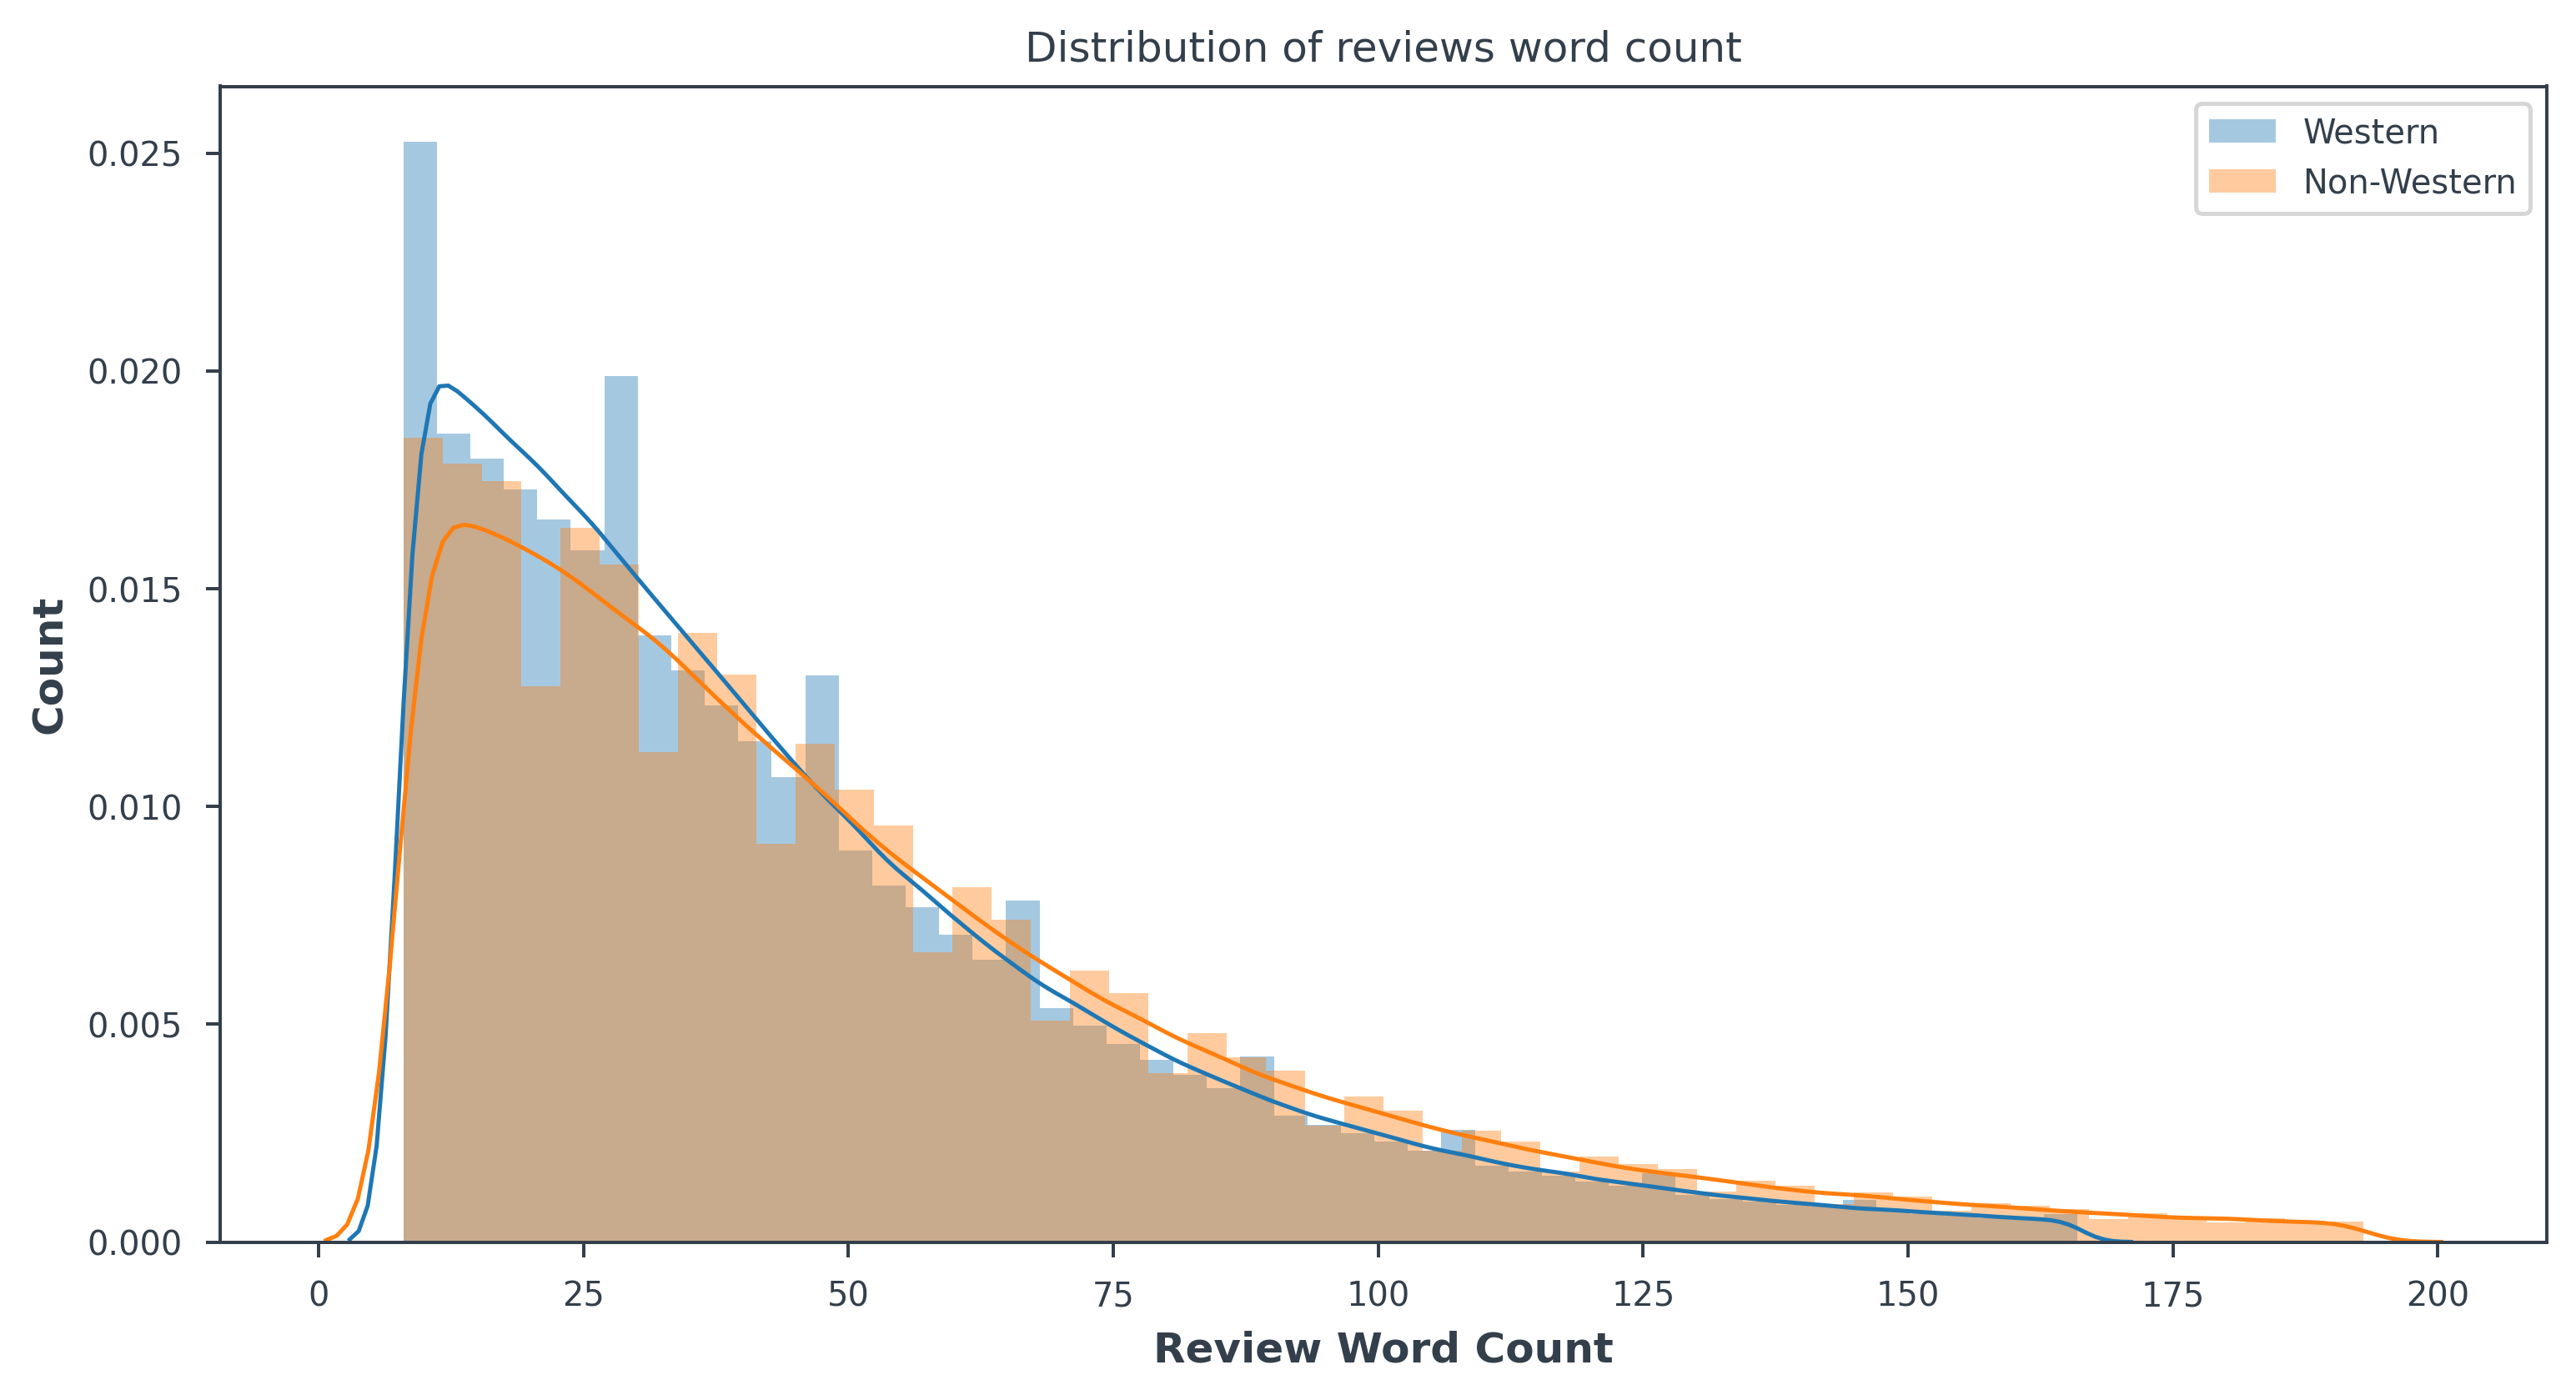

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

sns.distplot(data[data.type=='Western'].review_word_count, bins=50, ax=ax, label='Western')
sns.distplot(data[data.type=='Non-Western'].review_word_count, bins=50, ax=ax, label='Non-Western')

plt.title('Distribution of reviews word count')
plt.xlabel('Review Word Count')
plt.ylabel('Count')
plt.legend()

plt.show();

In [11]:
print('The average number of words in reviews is: {}'.format(round(data.review_word_count.mean())))
print('The minimum number of words in reviews is: {}'.format(min(data.review_word_count)))
print('The maximum number of words in reviews is: {}'.format(max(data.review_word_count)))

The average number of words in reviews is: 47
The minimum number of words in reviews is: 8
The maximum number of words in reviews is: 193


#### Bin 'review_word_count' into three discrete set of labels: 'Short', 'Medium' and 'Long' 

In [12]:
bins = [0, 20, 50, 193]
labels = ['Short', 'Medium', 'Long']
data['review_word_bined'] = pd.cut(data['review_word_count'], bins=bins, labels=labels)

In [13]:
data.review_word_bined[data.type=='Western'].value_counts()

Medium    1095560
Long       905072
Short      666727
Name: review_word_bined, dtype: int64

In [14]:
data.review_word_bined[data.type=='Non-Western'].value_counts()

Long      354087
Medium    344596
Short     191357
Name: review_word_bined, dtype: int64

#### Plot mean review word count by year

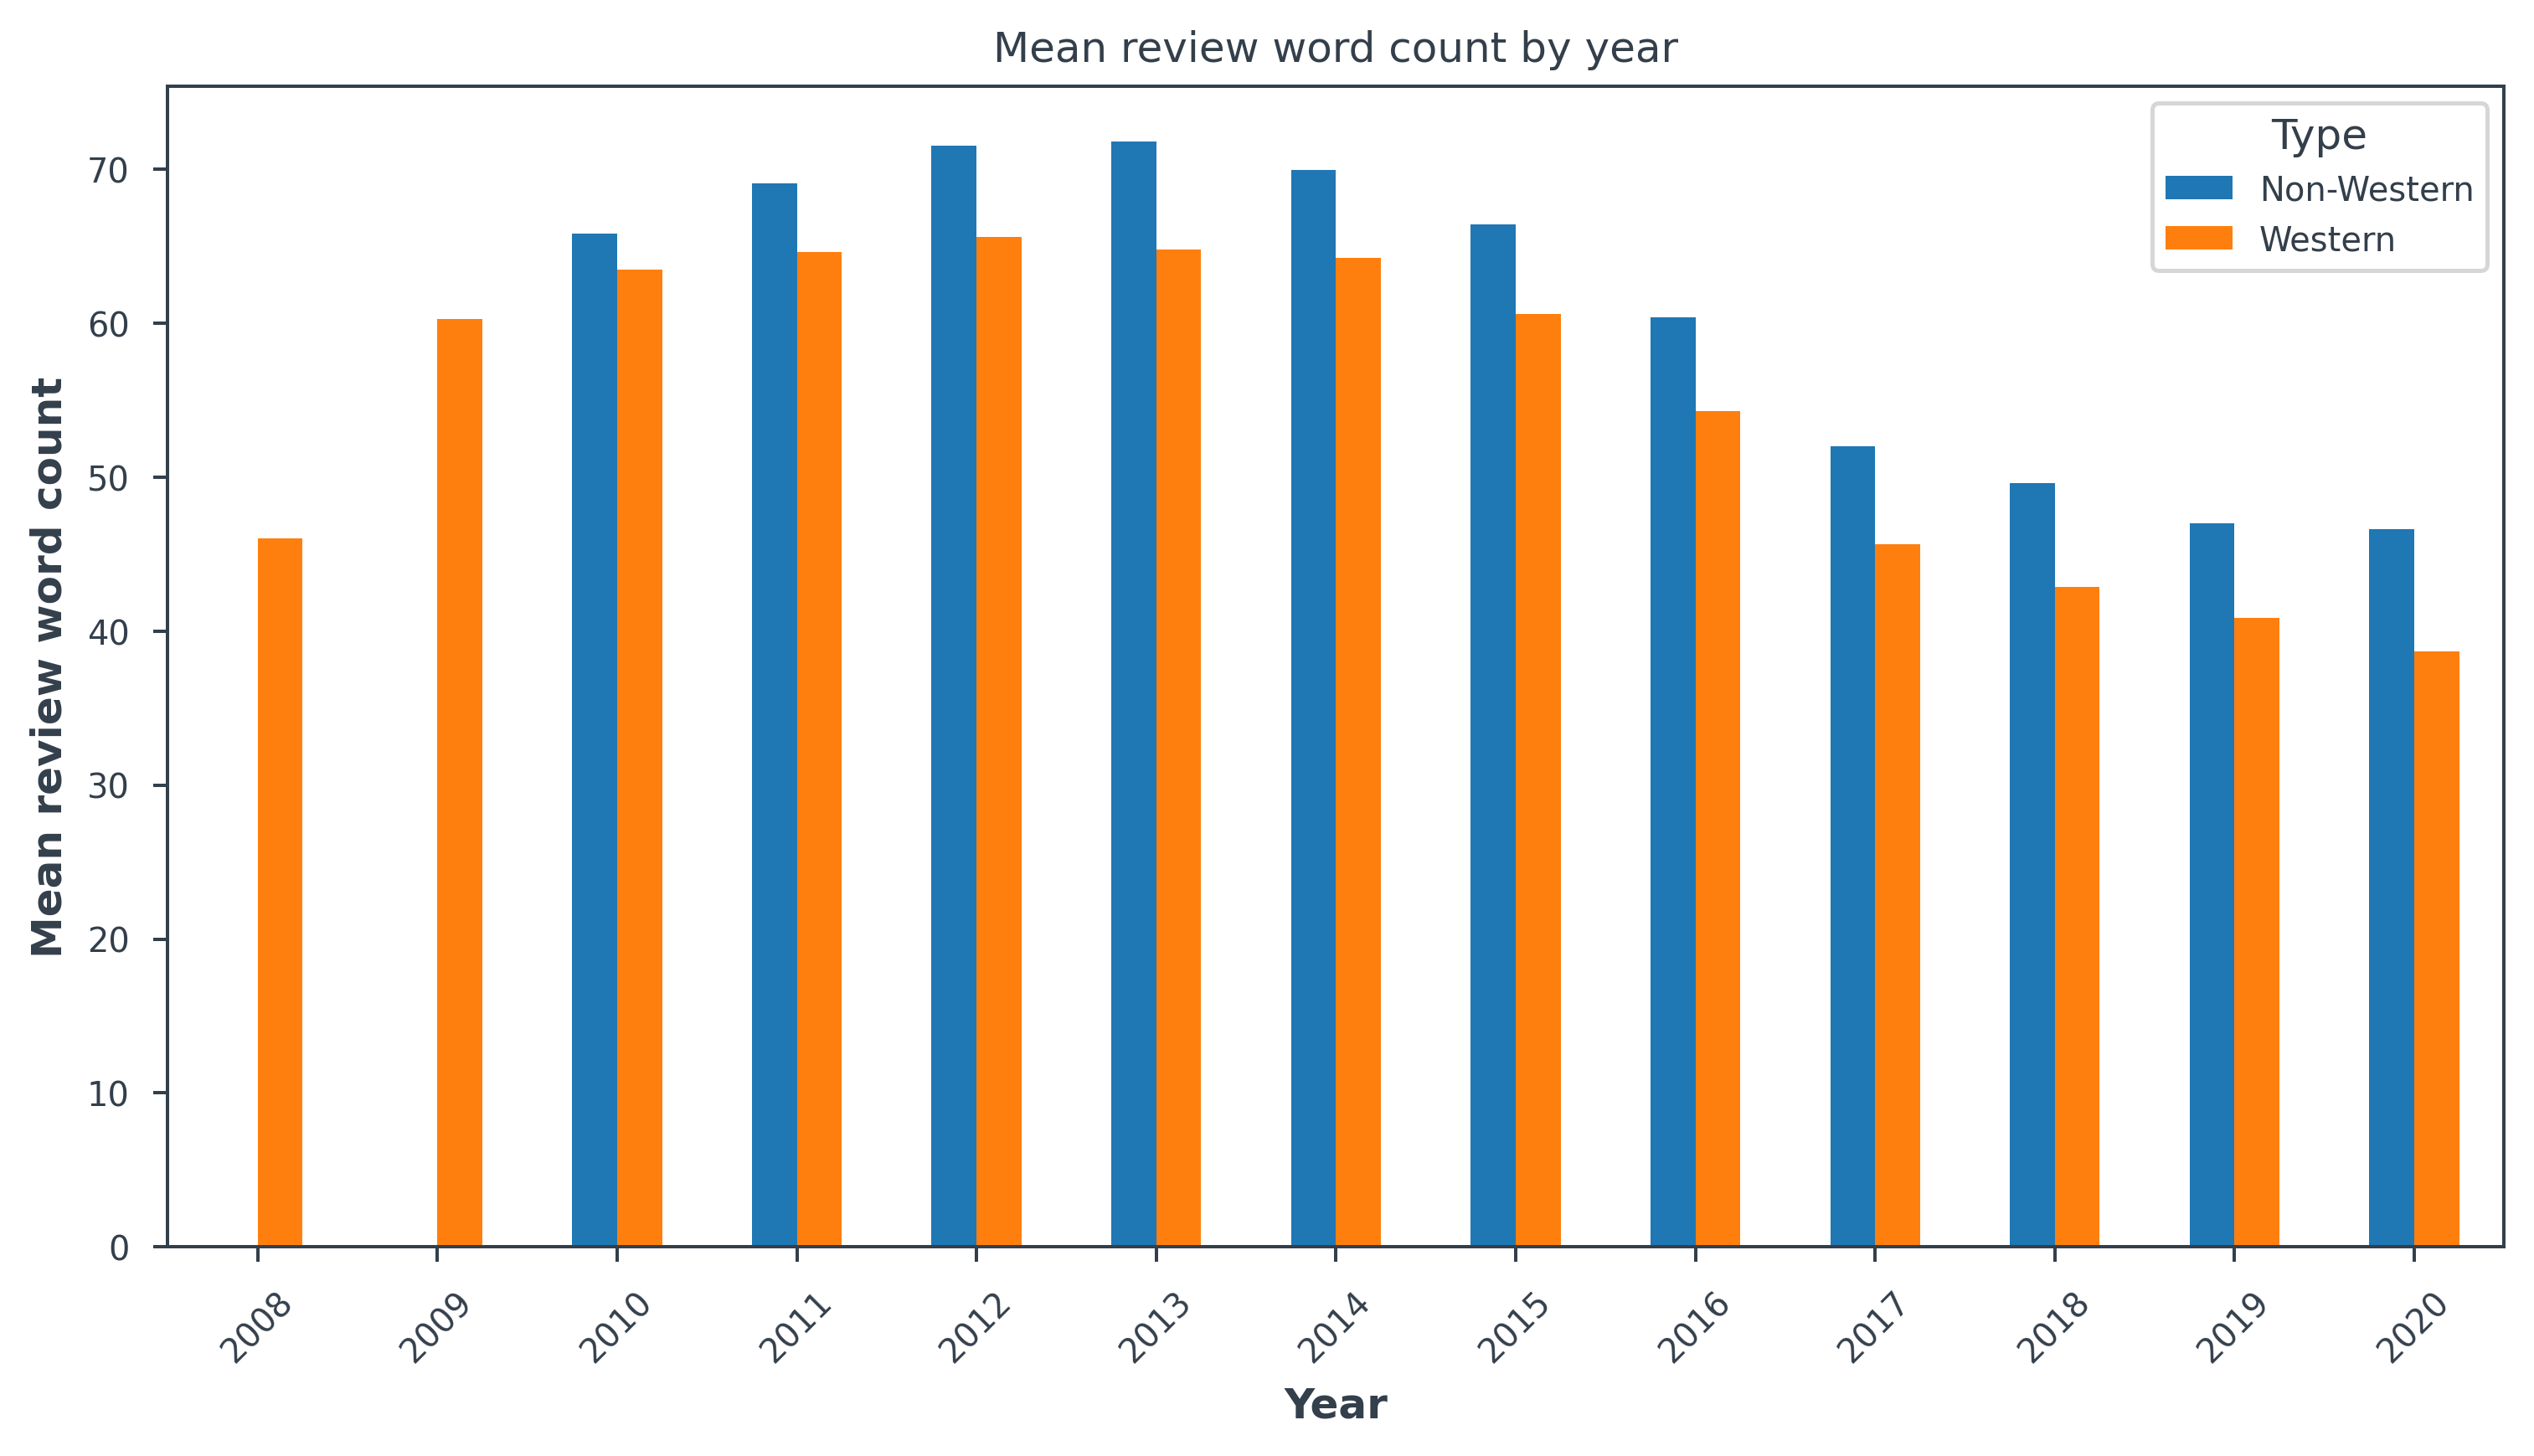

In [15]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['year', 'type'])['review_word_count'].mean().unstack().plot(kind='bar', ax=ax)
plt.title('Mean review word count by year')
plt.legend(title='Type')
plt.xlabel('Year')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

#### Plot mean review word count by city

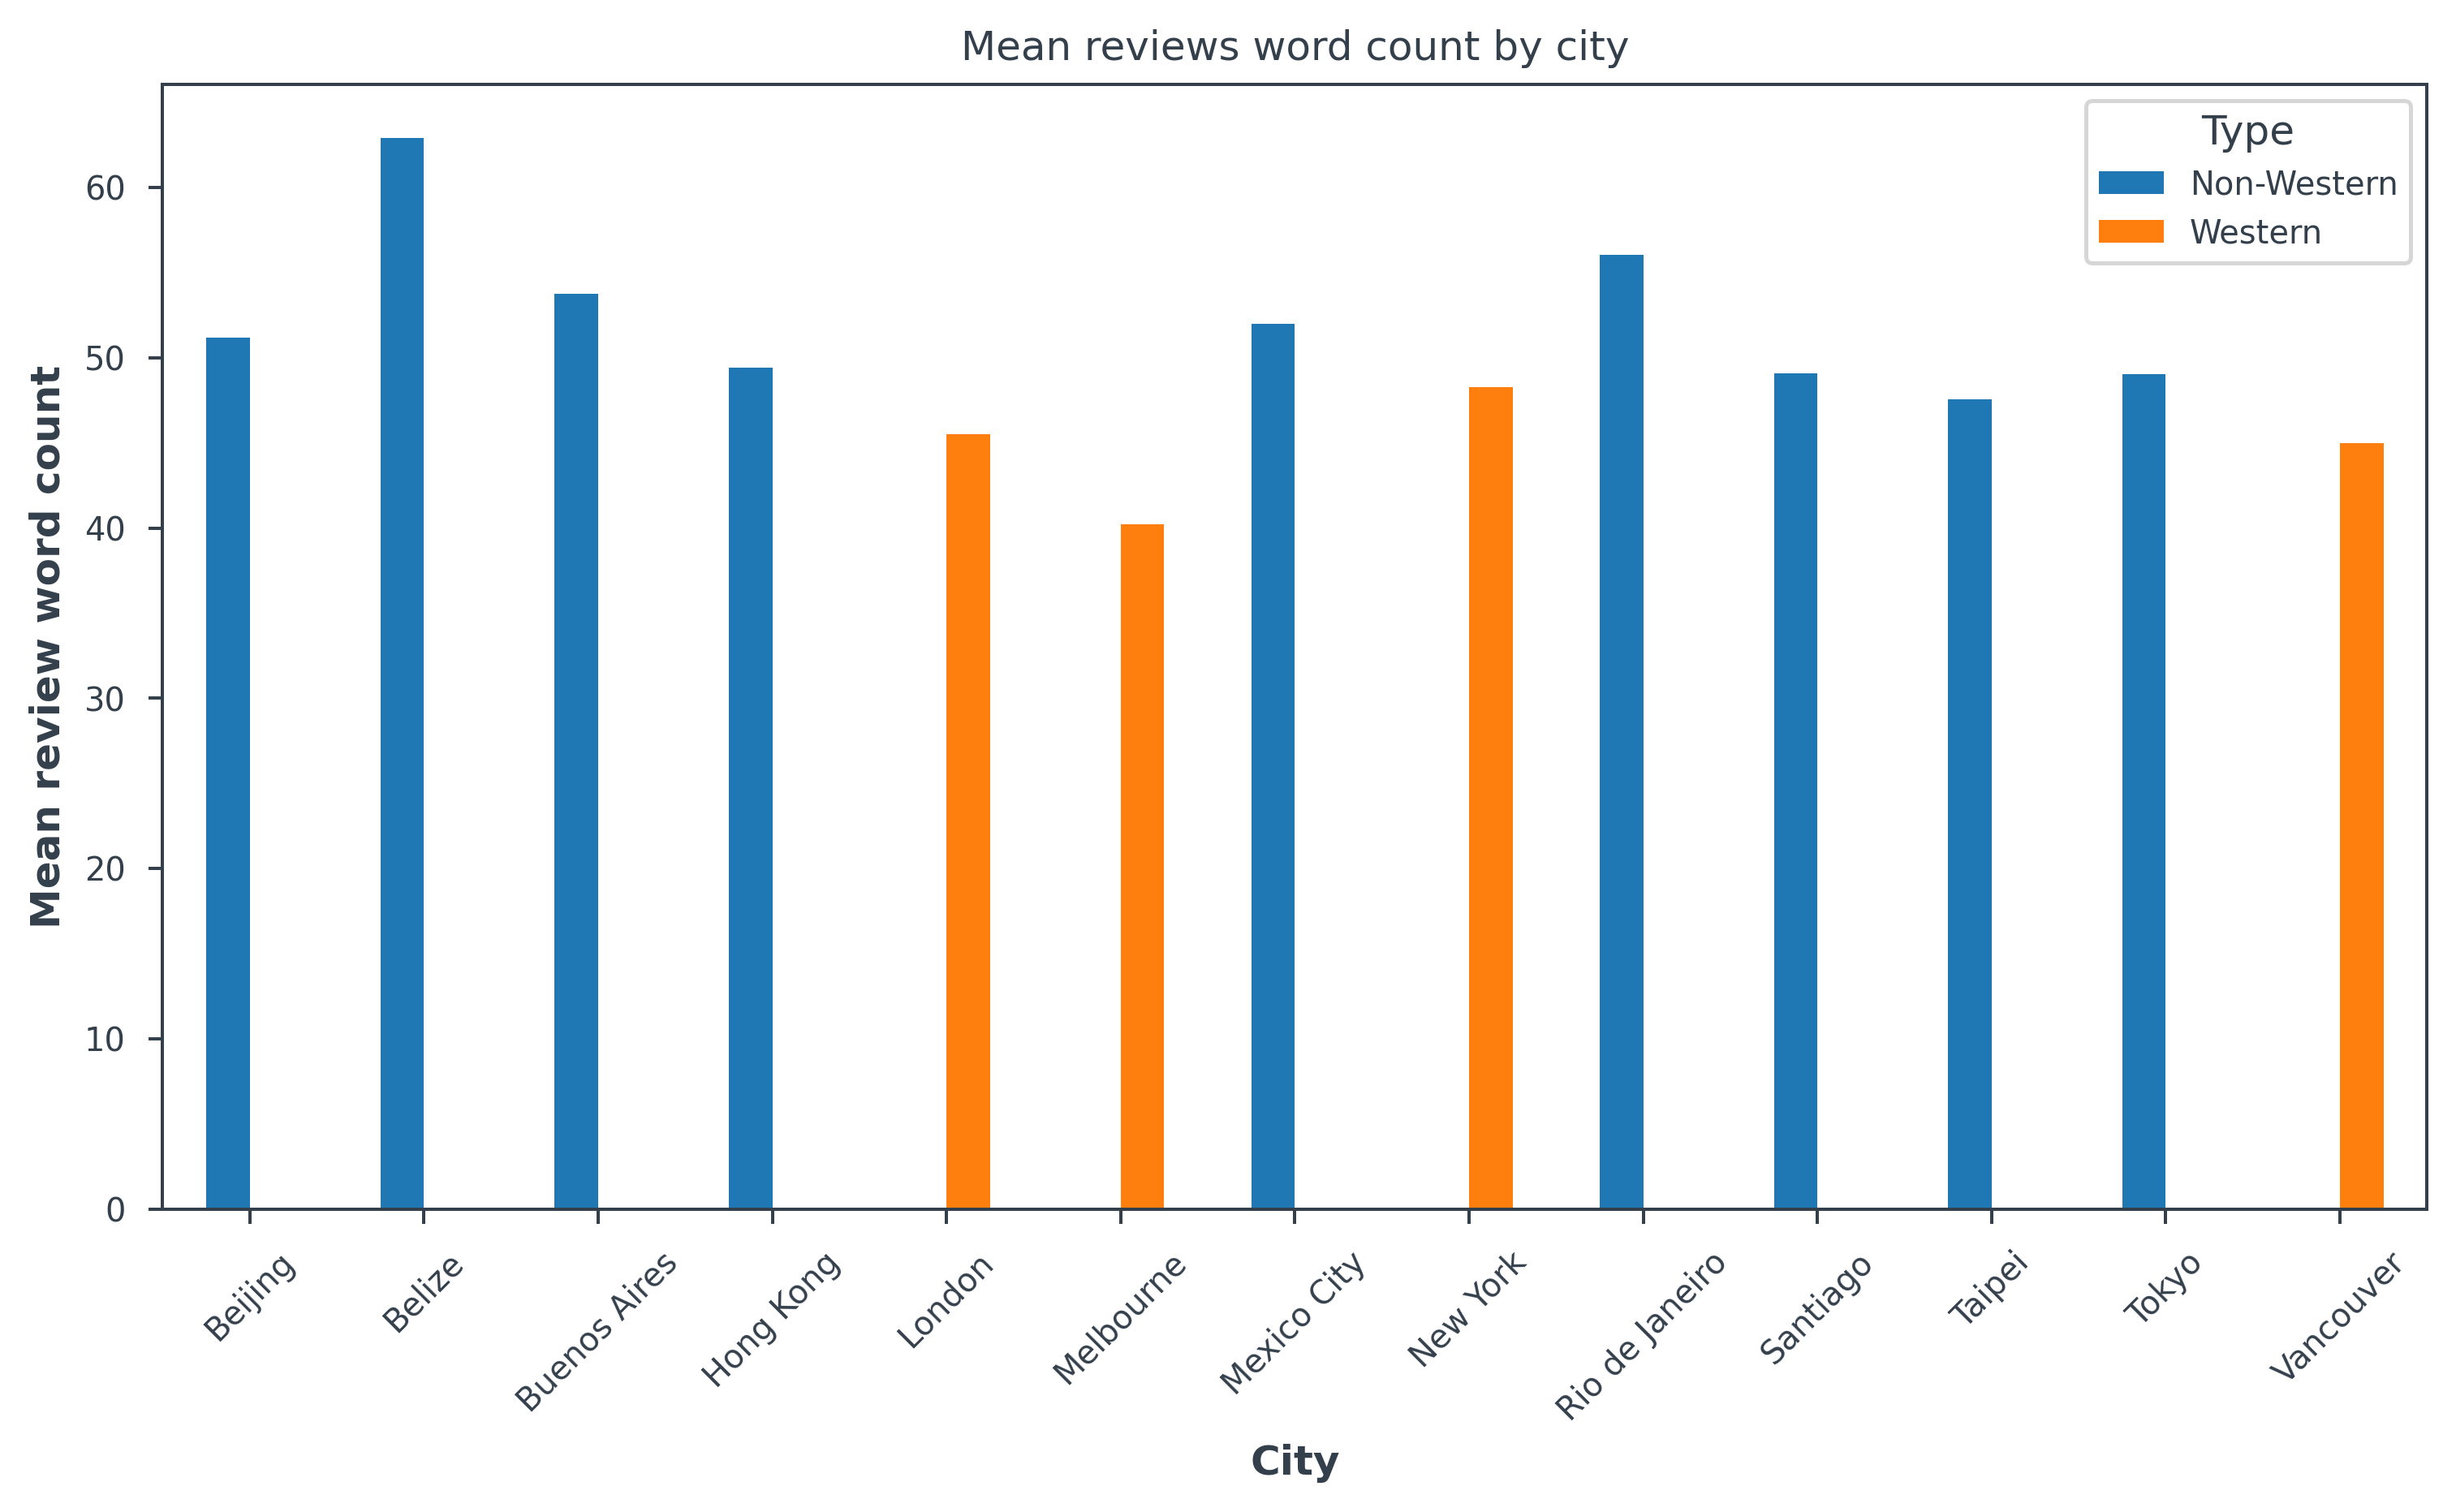

In [16]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['city', 'type'])['review_word_count'].mean().reset_index().pivot('city', 'type', 'review_word_count')\
            .plot(kind='bar', ax=ax,)
plt.title('Mean reviews word count by city')
plt.legend(title='Type')
plt.xlabel('City')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

#### Plot mean review count by year and city

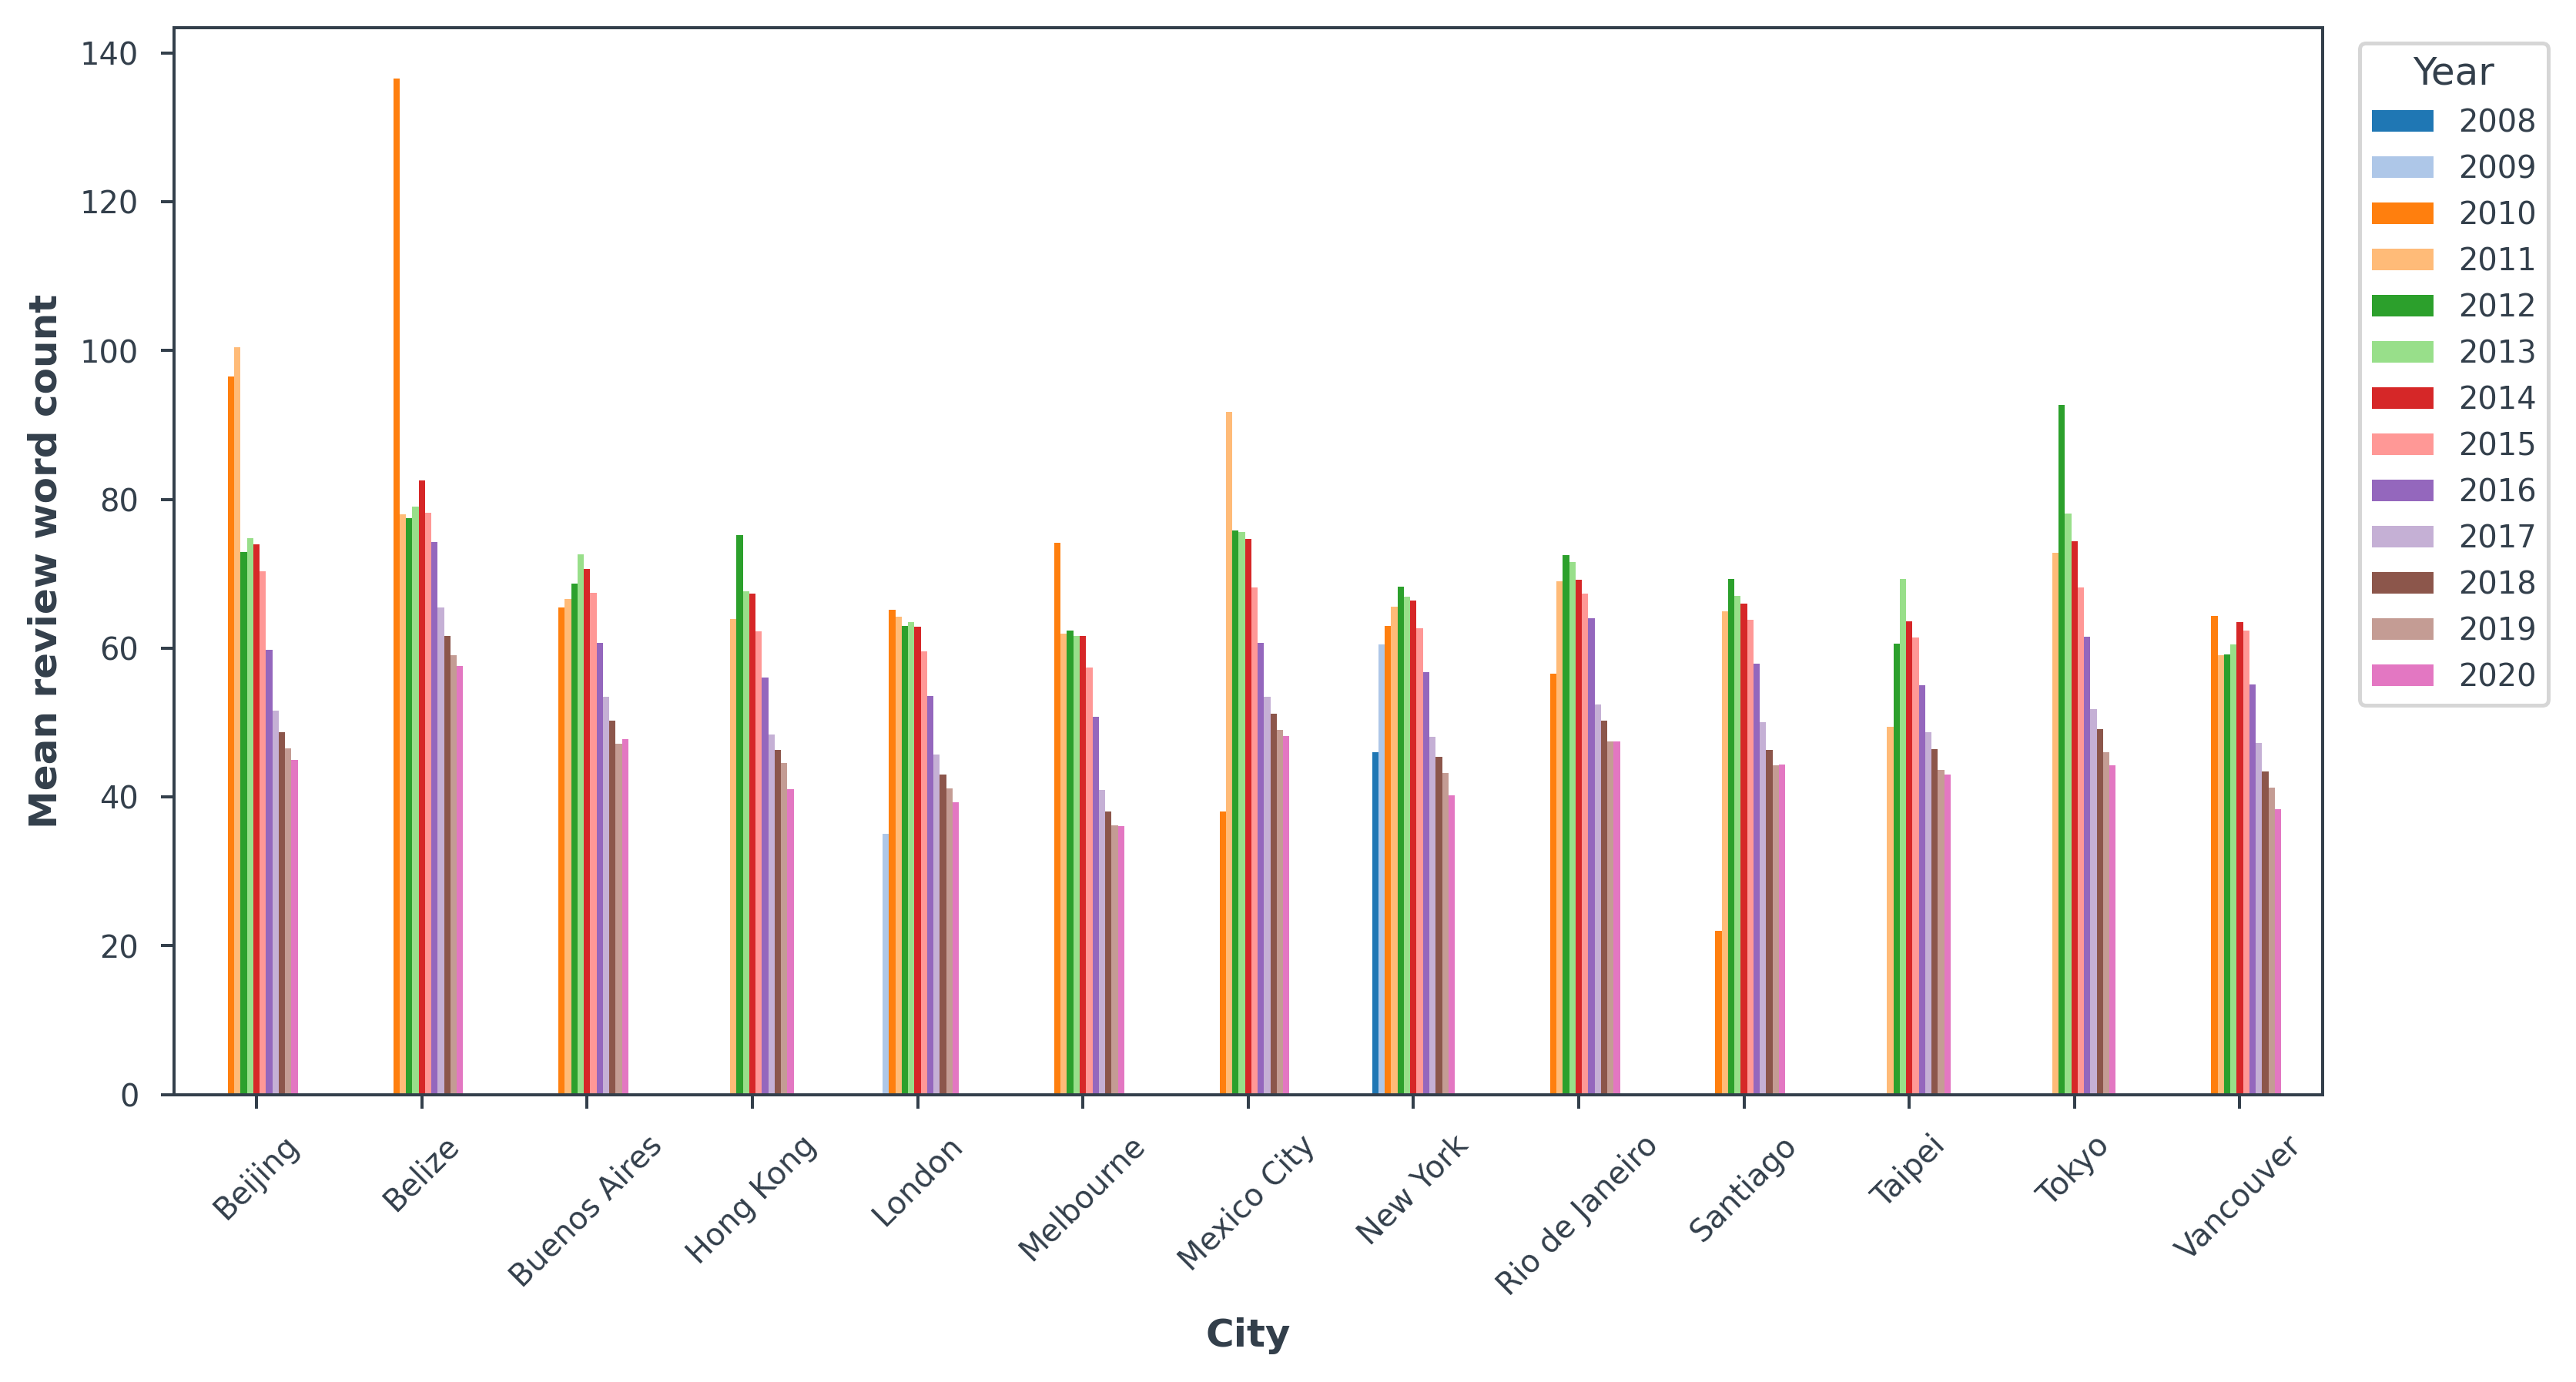

In [17]:
fig, ax = plt.subplots(figsize=(10,5))

data.groupby(['city', 'year'])['review_word_count'].mean().reset_index().pivot('city', 'year', 'review_word_count').plot(kind='bar', ax=ax, color=color)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Year')
plt.xlabel('City')
plt.ylabel('Mean review word count')
plt.tick_params(axis='x', rotation=45)

plt.show();

In [7]:
def stratified_sample_df(df, col, n_samples):
    n = min(n_samples, df[col].value_counts().min())
    df_ = df.groupby(col).apply(lambda x: x.sample(n))
    df_.index = df_.index.droplevel(0)
    return df_

In [8]:
data.city.value_counts().min()

20892

In [9]:
data_sample = stratified_sample_df(data, 'city', 5000)
print(data_sample.shape)
data_sample.head()

(65000, 26)


id        date  \
2669814   4878955  2018-08-31   
2667401     44054  2018-06-20   
2677810  19224312  2017-09-26   
2676429  17177878  2017-08-24   
2687671  37847325  2019-10-26   

                                                  comments    host_id  \
2669814  5+ stars for Lu and her son's amazing hospital...   22403478   
2667401  good location,fast response host,helpful host,...     192875   
2677810  Nice place,  everything quite new and clean. J...   92782799   
2676429  We loved the bunk beds for our two children an...   62462866   
2687671  Nice host ! The apartment was comfortable, to ...  286588957   

        neighbourhood_cleansed     city  latitude  longitude  \
2669814           顺义区 / Shunyi  Beijing  40.03849  116.59473   
2667401         朝阳区 / Chaoyang  Beijing  39.89425  116.45089   
2677810                    东城区  Beijing  39.94674  116.39123   
2676429         朝阳区 / Chaoyang  Beijing  40.05090  116.42354   
2687671                    昌平区  Beijing  40.15512  116.30927   

         number_of_reviews first_review  ...  \
2669814                 64   2016-03-25  ...   
2667401                 99   2010-08-25  ...   
2677810                 68   2017-06-20  ...   
2676429                 35   2017-06-12  ...   
2687671                  3   2019-09-21  ...   

                                         comments_expanded  \
2669814  5+ stars for Lu and her son's amazing hospital...   
2667401  good location,fast response host,helpful host,...   
2677810  Nice place,  everything quite new and clean. J...   
2676429  We loved the bunk beds for our two children an...   
2687671  Nice host ! The apartment was comfortable, to ...   

                                          comments_cleaned review_word_count  \
2669814  stars for Lu and her son s amazing hospitality...                71   
2667401  good location fast response host helpful host ...                11   
2677810  Nice place everything quite new and clean. Jen...                74   
2676429  We loved the bunk beds for our two children an...                97   
2687671  Nice host. The apartment was comfortable to re...                26   

         year  sentiment_from_rating sentiment_reviews  \
2669814  2018                    pos                 1   
2667401  2018                    pos                 1   
2677810  2017                    pos                 1   
2676429  2017                    pos                 1   
2687671  2019                    neu                 1   

        sentiment_reviews_textblob  \
2669814                          1   
2667401                          1   
2677810                          1   
2676429                          1   
2687671                          1   

                                     comments_to_sentences  \
2669814  [stars for Lu and her son s amazing hospitalit...   
2667401  [good location fast response host helpful host...   
2677810  [Nice place everything quite new and clean., J...   
2676429  [We loved the bunk beds for our two children a...   
2687671  [Nice host., The apartment was comfortable to ...   

         sentiment_sentences         type  
2669814      [1, 0, 1, 1, 0]  Non-Western  
2667401                  [1]  Non-Western  
2677810      [1, 0, 0, 0, 1]  Non-Western  
2676429     [1, 0, -1, 1, 1]  Non-Western  
2687671         [0, 1, 0, 1]  Non-Western  

[5 rows x 26 columns]

In [12]:
with open('data_sample.pkl', 'wb') as f:
    pickle.dump(data_sample, f)

### Review preprocessing by sentences

#### Extract reviews

In [10]:
content = data_sample.comments_to_sentences.values.tolist()

In [12]:
pprint(content[:10])

[['stars for Lu and her son s amazing hospitality everything about my stay was '
  'perfect fast communication pickup at the airport warm-hearted welcome '
  'delicious food clean and well-located apartment airport dropoff.',
  'I had a long layover in Beijing so overnighted at her place which is very '
  'close to the airport.',
  'I felt like I was staying with relatives or old friends.',
  'Thanks so much Lu for your warm welcome.',
  'Highly recommended'],
 ['good location fast response host helpful host suitable for a family'],
 ['Nice place everything quite new and clean.',
  'Jenny is very friendly and let us store our luggage and hang around after '
  'we check out while waiting for our flight Website hidden by Airbnb We '
  'reached at night so its abit hard to locate the place as the alleys are '
  'dark and narrow.',
  'Better to reach before dark.',
  'Lots of food on the main street and short distance from subway.',
  'Overall a very pleasant stay'],
 ['We loved the bunk b

In [11]:
with open('content.pkl', 'wb') as f:
    pickle.dump(content, f)

#### Plot most frequent words before preprocessing

In [124]:
def freq_words(content):
    all_words = [word for sentences in content for sentence in sentences for word in simple_preprocess(str(sentence), deacc=True)]
    freq_dist = FreqDist(all_words)
    return freq_dist

In [125]:
%%time
words_freq = freq_words(content)

CPU times: user 9min 15s, sys: 12.8 s, total: 9min 28s
Wall time: 9min 29s


In [128]:
def plot_freq_words(fdist, terms=20):
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    d = words_df.nlargest(columns='count', n=terms) 
    
    plt.figure(figsize=(20,7))
    ax = sns.barplot(data=d, x='word', y='count')
    ax.set_ylabel('Count')
    ax.set_xlabel('Word')
    plt.title('Most frequent words before preprocessing')
    
    plt.show();

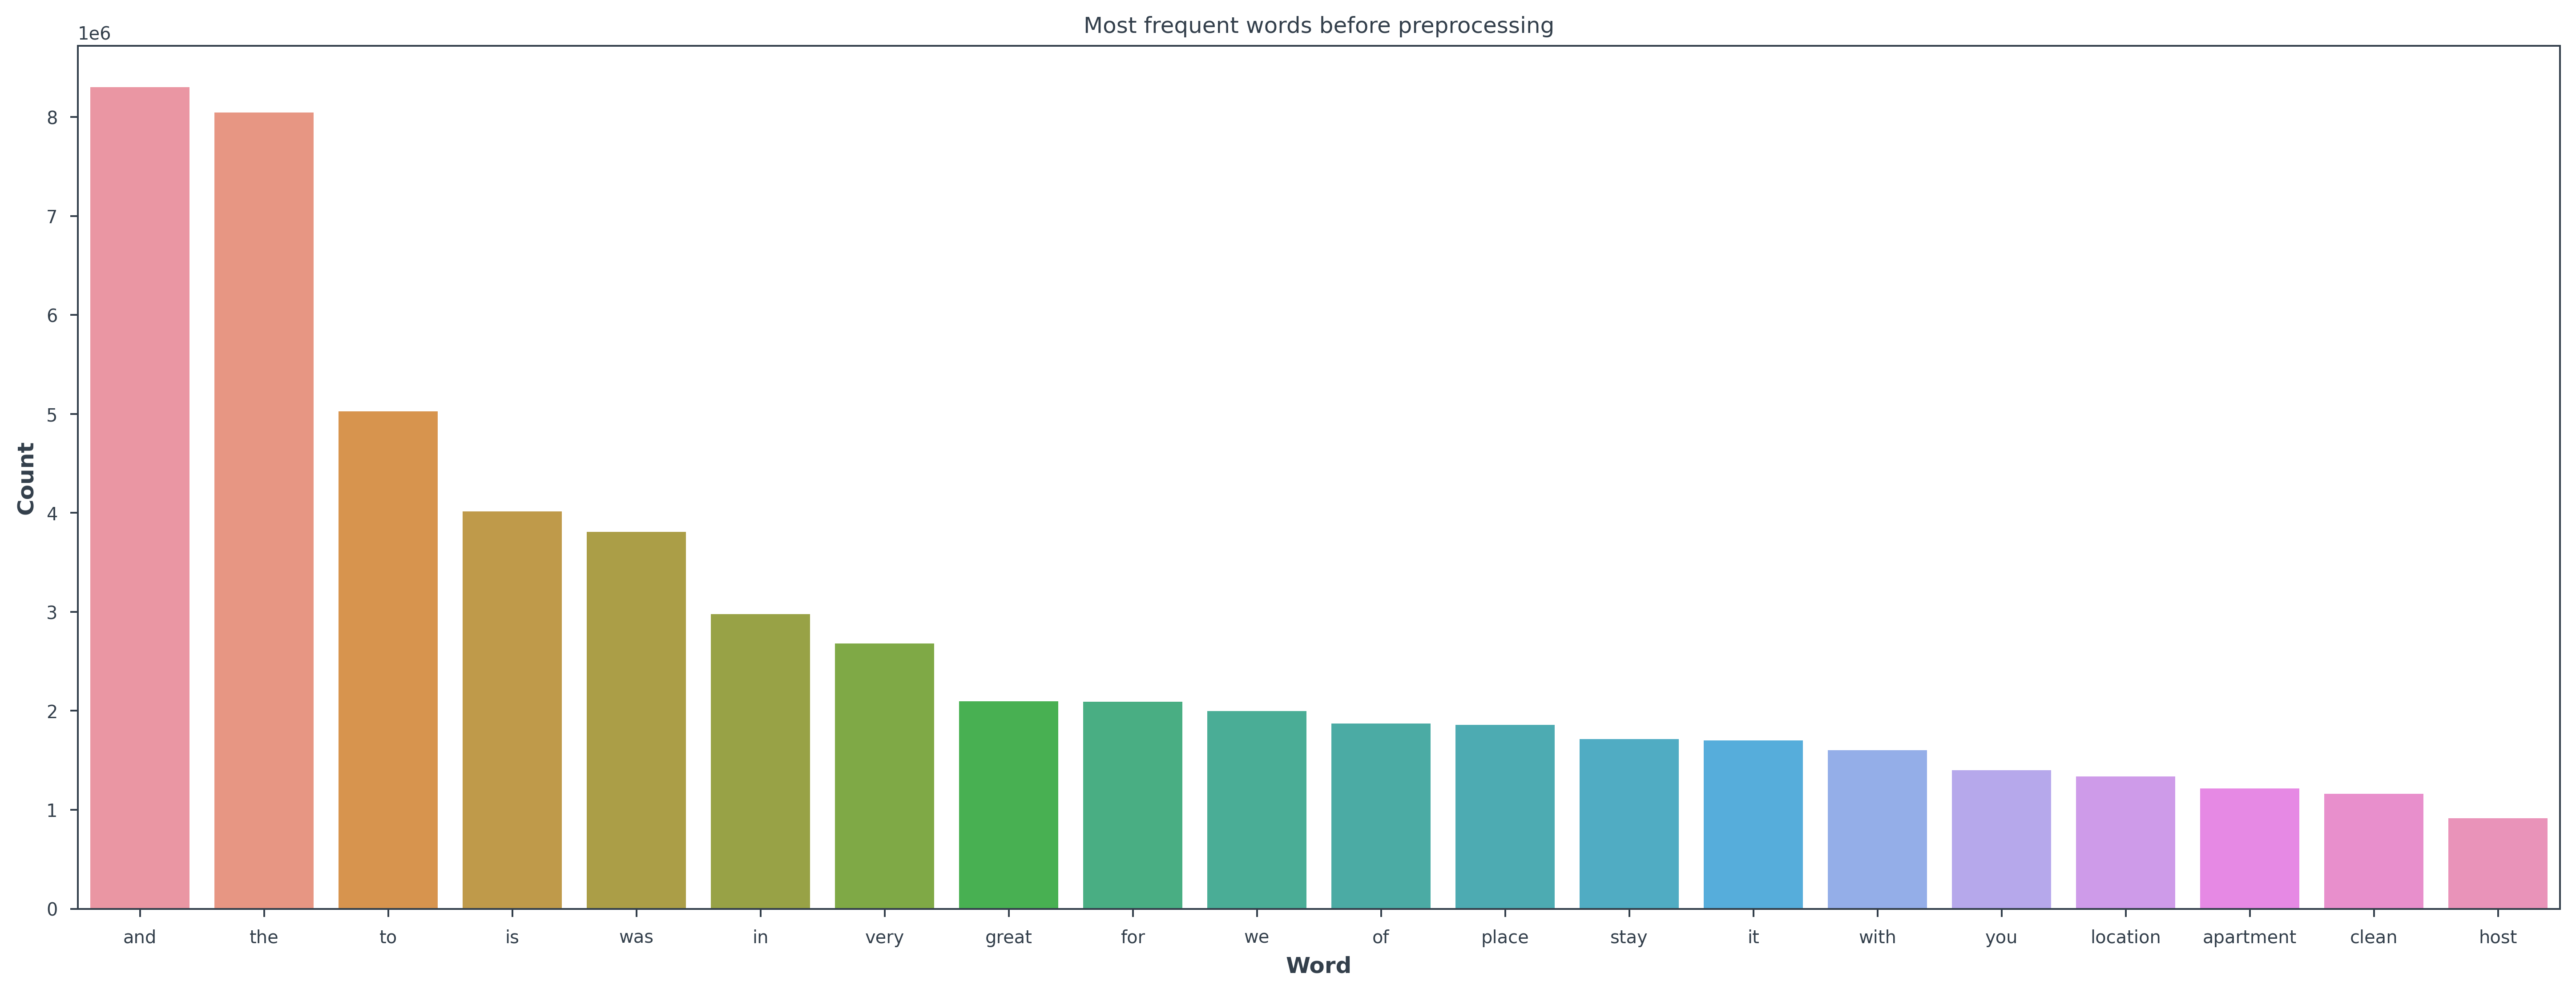

In [127]:
plot_freq_words(words_freq, 20)

#### Tokenize, lowercase and remove punctuation

In [83]:
def sentence_to_words(doc):
    return [simple_preprocess(str(sentence), deacc=True) for review in doc for sentence in review]

In [84]:
%%time
data_words = list(sentence_to_words(content))

CPU times: user 3.28 s, sys: 36 ms, total: 3.31 s
Wall time: 3.32 s


In [85]:
print(data_words[:10])

[['the', 'host', 'was', 'very', 'friendly', 'and', 'accommodating'], ['he', 'communicates', 'well', 'and', 'speaks', 'great', 'english'], ['he', 'was', 'so', 'kind', 'enough', 'not', 'to', 'charge', 'me', 'extra', 'when', 'we', 'had', 'to', 'break', 'the', 'lock', 'because', 'left', 'my', 'keys', 'inside'], ['he', 'is', 'very', 'responsive', 'to', 'my', 'questions', 'and', 'concerns'], ['the', 'place', 'is', 'near', 'the', 'bus', 'station', 'and', 'minutes', 'away', 'via', 'taxi', 'from', 'forbidden', 'city', 'temple', 'of', 'heaven', 'the', 'neighboorhood', 'is', 'quiet', 'and', 'has', 'convenience', 'stores', 'and', 'local', 'affordable', 'restos'], ['the', 'toilet', 'is', 'clean', 'and', 'room', 'is', 'wide'], ['just', 'take', 'note', 'that', 'there', 'is', 'no', 'elevator'], ['overall', 'it', 'was', 'delightful', 'stay'], ['good', 'location', 'close', 'to', 'the', 'subway'], ['the', 'place', 'is', 'very', 'beautiful', 'and', 'the', 'host', 'communicated', 'in', 'an', 'operative', '

#### Create bigram and trigram models

In [86]:
%%time
#Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=20)
trigram = gensim.models.Phrases(bigram[data_words])

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

CPU times: user 11.7 s, sys: 0 ns, total: 11.7 s
Wall time: 11.8 s


In [88]:
print(bigram_mod[data_words][0])
print(trigram_mod[data_words][0])

['the', 'host', 'was', 'very', 'friendly', 'and', 'accommodating']
['the', 'host', 'was', 'very', 'friendly', 'and', 'accommodating']


#### Remove stop words

In [89]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(sentence)) if word not in stop_words] for sentence in texts]

In [90]:
%%time
data_words_nostops = remove_stopwords(data_words)

CPU times: user 3.8 s, sys: 37 µs, total: 3.8 s
Wall time: 3.82 s


In [91]:
print(data_words_nostops[:10])

[['host', 'friendly', 'accommodating'], ['communicates', 'well', 'speaks', 'great', 'english'], ['kind', 'enough', 'charge', 'extra', 'break', 'lock', 'left', 'keys', 'inside'], ['responsive', 'questions', 'concerns'], ['place', 'near', 'bus', 'station', 'minutes', 'away', 'via', 'taxi', 'forbidden', 'city', 'temple', 'heaven', 'neighboorhood', 'quiet', 'convenience', 'stores', 'local', 'affordable', 'restos'], ['toilet', 'clean', 'room', 'wide'], ['take', 'note', 'elevator'], ['overall', 'delightful', 'stay'], ['good', 'location', 'close', 'subway'], ['place', 'beautiful', 'host', 'communicated', 'operative', 'kind', 'way']]


#### Make bigrams and trigrams

In [92]:
def make_bigrams(texts):
    return [bigram_mod[sentence] for sentence in texts]

In [93]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[sentence]] for sentence in texts]

In [94]:
%%time
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_trigrams = make_trigrams(make_bigrams(data_words_nostops))
print(data_words_trigrams[:100])

[['host', 'friendly', 'accommodating'], ['communicates', 'well', 'speaks', 'great', 'english'], ['kind_enough', 'charge', 'extra', 'break', 'lock', 'left', 'keys', 'inside'], ['responsive', 'questions', 'concerns'], ['place', 'near', 'bus_station', 'minutes_away', 'via', 'taxi', 'forbidden_city', 'temple', 'heaven', 'neighboorhood', 'quiet', 'convenience_stores', 'local', 'affordable', 'restos'], ['toilet', 'clean', 'room', 'wide'], ['take', 'note', 'elevator'], ['overall', 'delightful', 'stay'], ['good', 'location', 'close', 'subway'], ['place', 'beautiful', 'host', 'communicated', 'operative', 'kind', 'way'], ['nice', 'restaurants', 'convenience_stores', 'close', 'apartment'], ['pleasant', 'experience', 'live', 'zhis', 'place'], ['mattress', 'comfortable', 'room', 'well_decorated'], ['environment', 'quiet', 'among', 'urban'], ['location', 'perfect'], ['convenient', 'hung', 'go', 'shopping'], ['awesome', 'experience'], ['twin', 'boys', 'enjoyed', 'much'], ['quite', 'good', 'renovation

#### Lemmatize

In [95]:
def lemmatization(nlp, texts, allowed_postags=['NOUN', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sentence in texts:
        doc = nlp(' '.join(sentence)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [96]:
%%time
nlp = spacy.load('en', disable=['parser', 'ner'])

data_lemmatized = lemmatization(nlp, data_words_trigrams, allowed_postags=['NOUN', 'VERB'])

CPU times: user 3min 27s, sys: 23.7 ms, total: 3min 27s
Wall time: 3min 27s


In [97]:
print(data_lemmatized[:100])

[['host', 'accommodate'], ['speak'], ['charge', 'break', 'lock', 'leave', 'key'], ['question', 'concern'], ['place', 'resto'], ['room'], ['take', 'note', 'elevator'], ['stay'], ['close', 'subway'], ['place', 'host', 'communicate', 'kind', 'way'], ['restaurant', 'convenience_store', 'apartment'], ['experience', 'live', 'place'], ['room'], ['environment'], ['location'], ['shopping'], ['experience'], ['boy', 'enjoy'], ['renovation', 'style', 'location', 'lane', 'meter'], ['stay', 'day', 'get', 'loyalty', 'card', 'coffee'], ['apartment', 'level', 'need', 'manage', 'stair', 'handrail'], ['bed', 'manage', 'need', 'head', 'beam', 'stand'], ['put', 'stuff'], ['code', 'works_well', 'see', 'number', 'sun', 'shine', 'nee', 'learn', 'location', 'number', 'lock', 'people', 'compound'], ['apartment', 'light', 'attraction'], ['stay', 'apartment', 'contribute', 'time'], ['thank', 'host'], ['bring', 'water', 'location'], ['area'], ['center'], [], ['experience', 'stay'], ['definitely_recommend', 'accomm

In [28]:
#with open('data_lemmatized_all.pkl', 'wb') as f:
    pickle.dump(data_lemmatized, f)

In [98]:
with open('token.pkl', 'wb') as f:
    pickle.dump(data_lemmatized, f)

#### Plot most frequent words after preprocessing

In [141]:
words_freq = dict()
for doc in data_lemmatized:
    for word in doc:
        if word in words_freq:
            words_freq[word] = words_freq[word] + 1
        else:
            words_freq[word] = 1

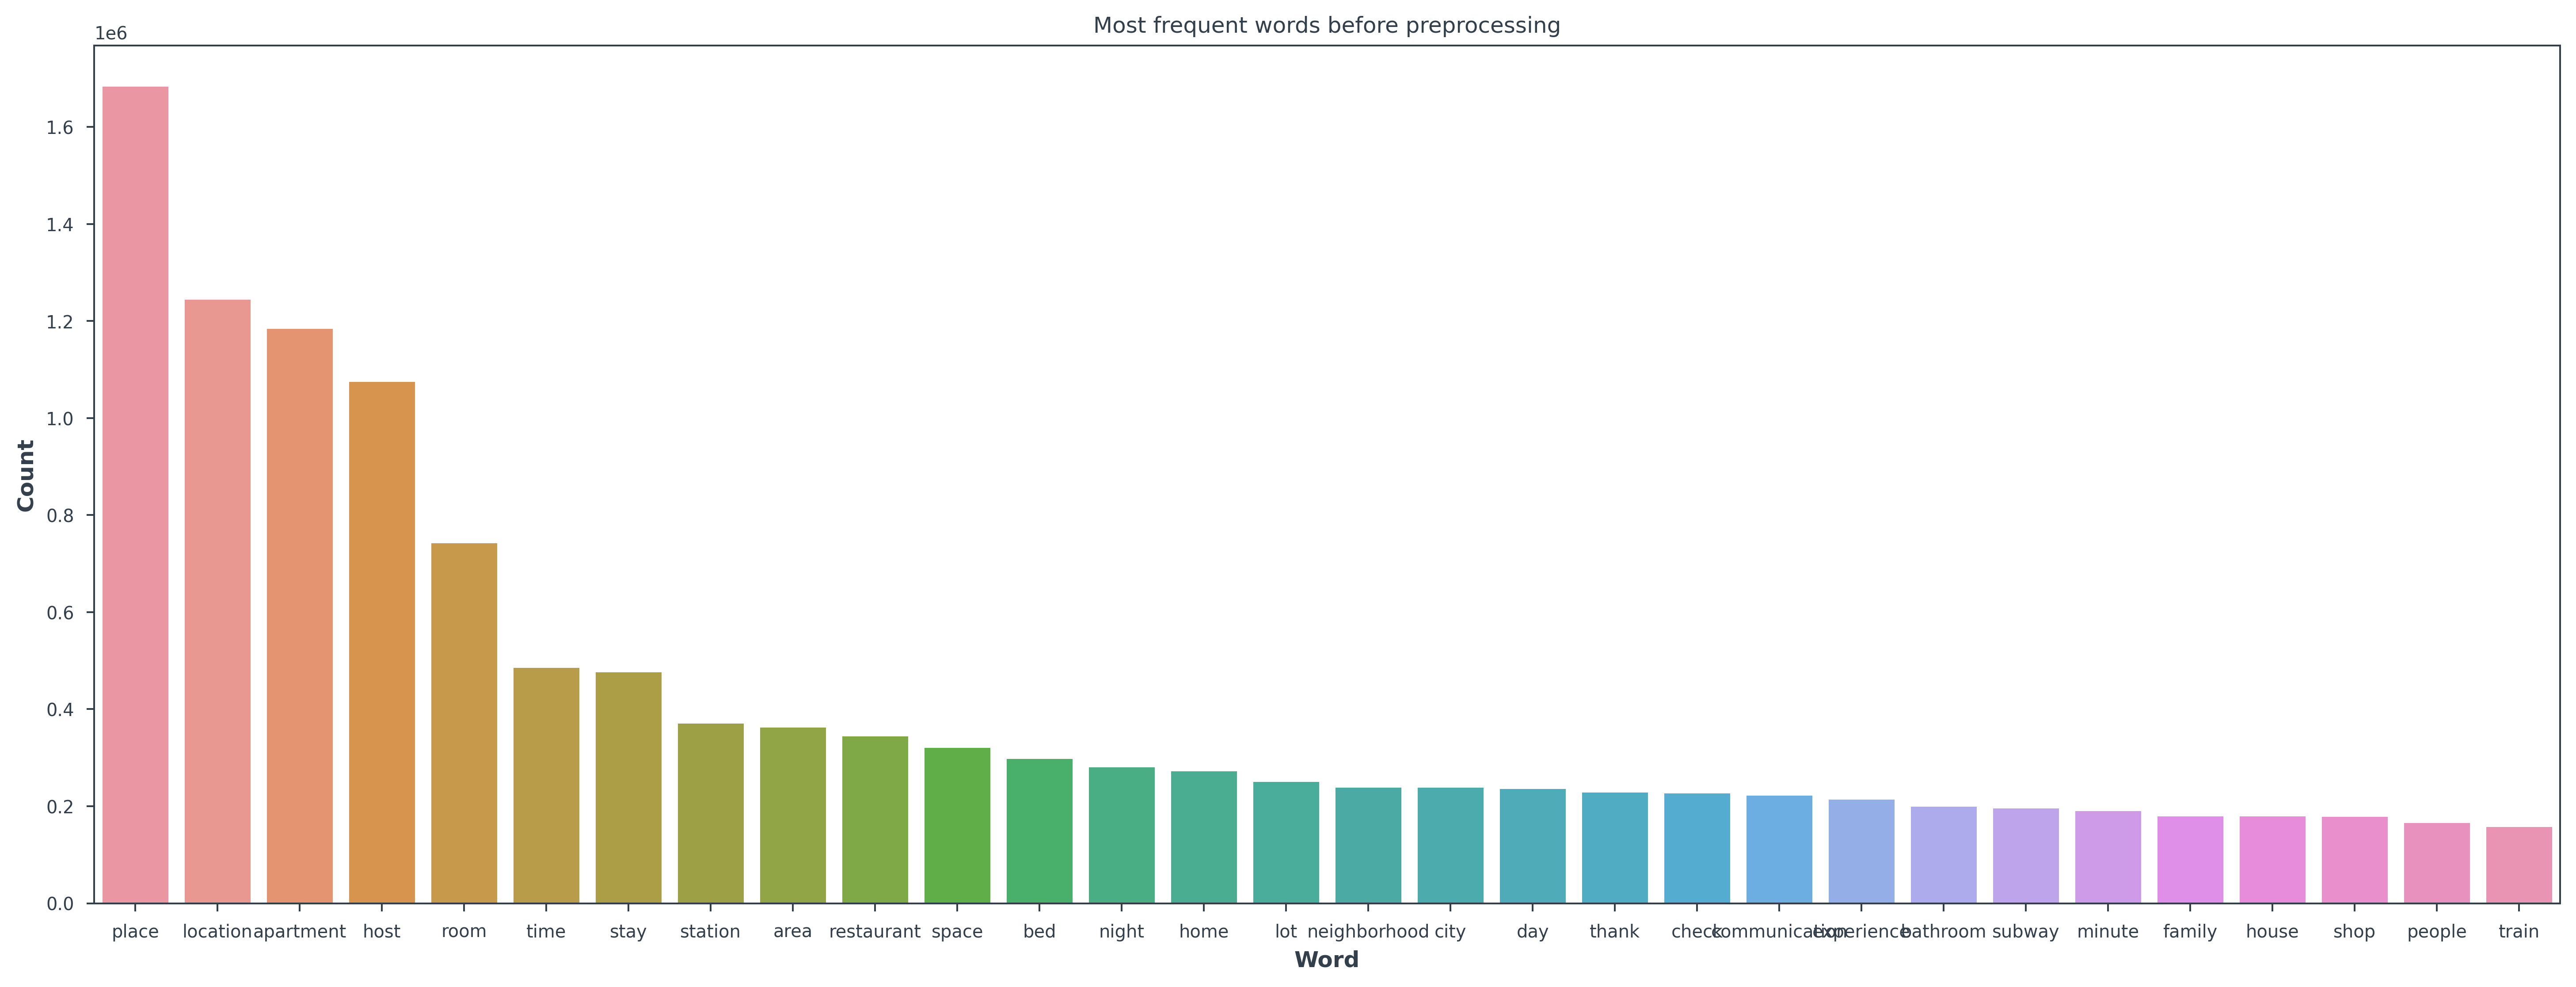

In [142]:
plot_freq_words(words_freq, 30)

#### Plot wordcloud of most frequent words

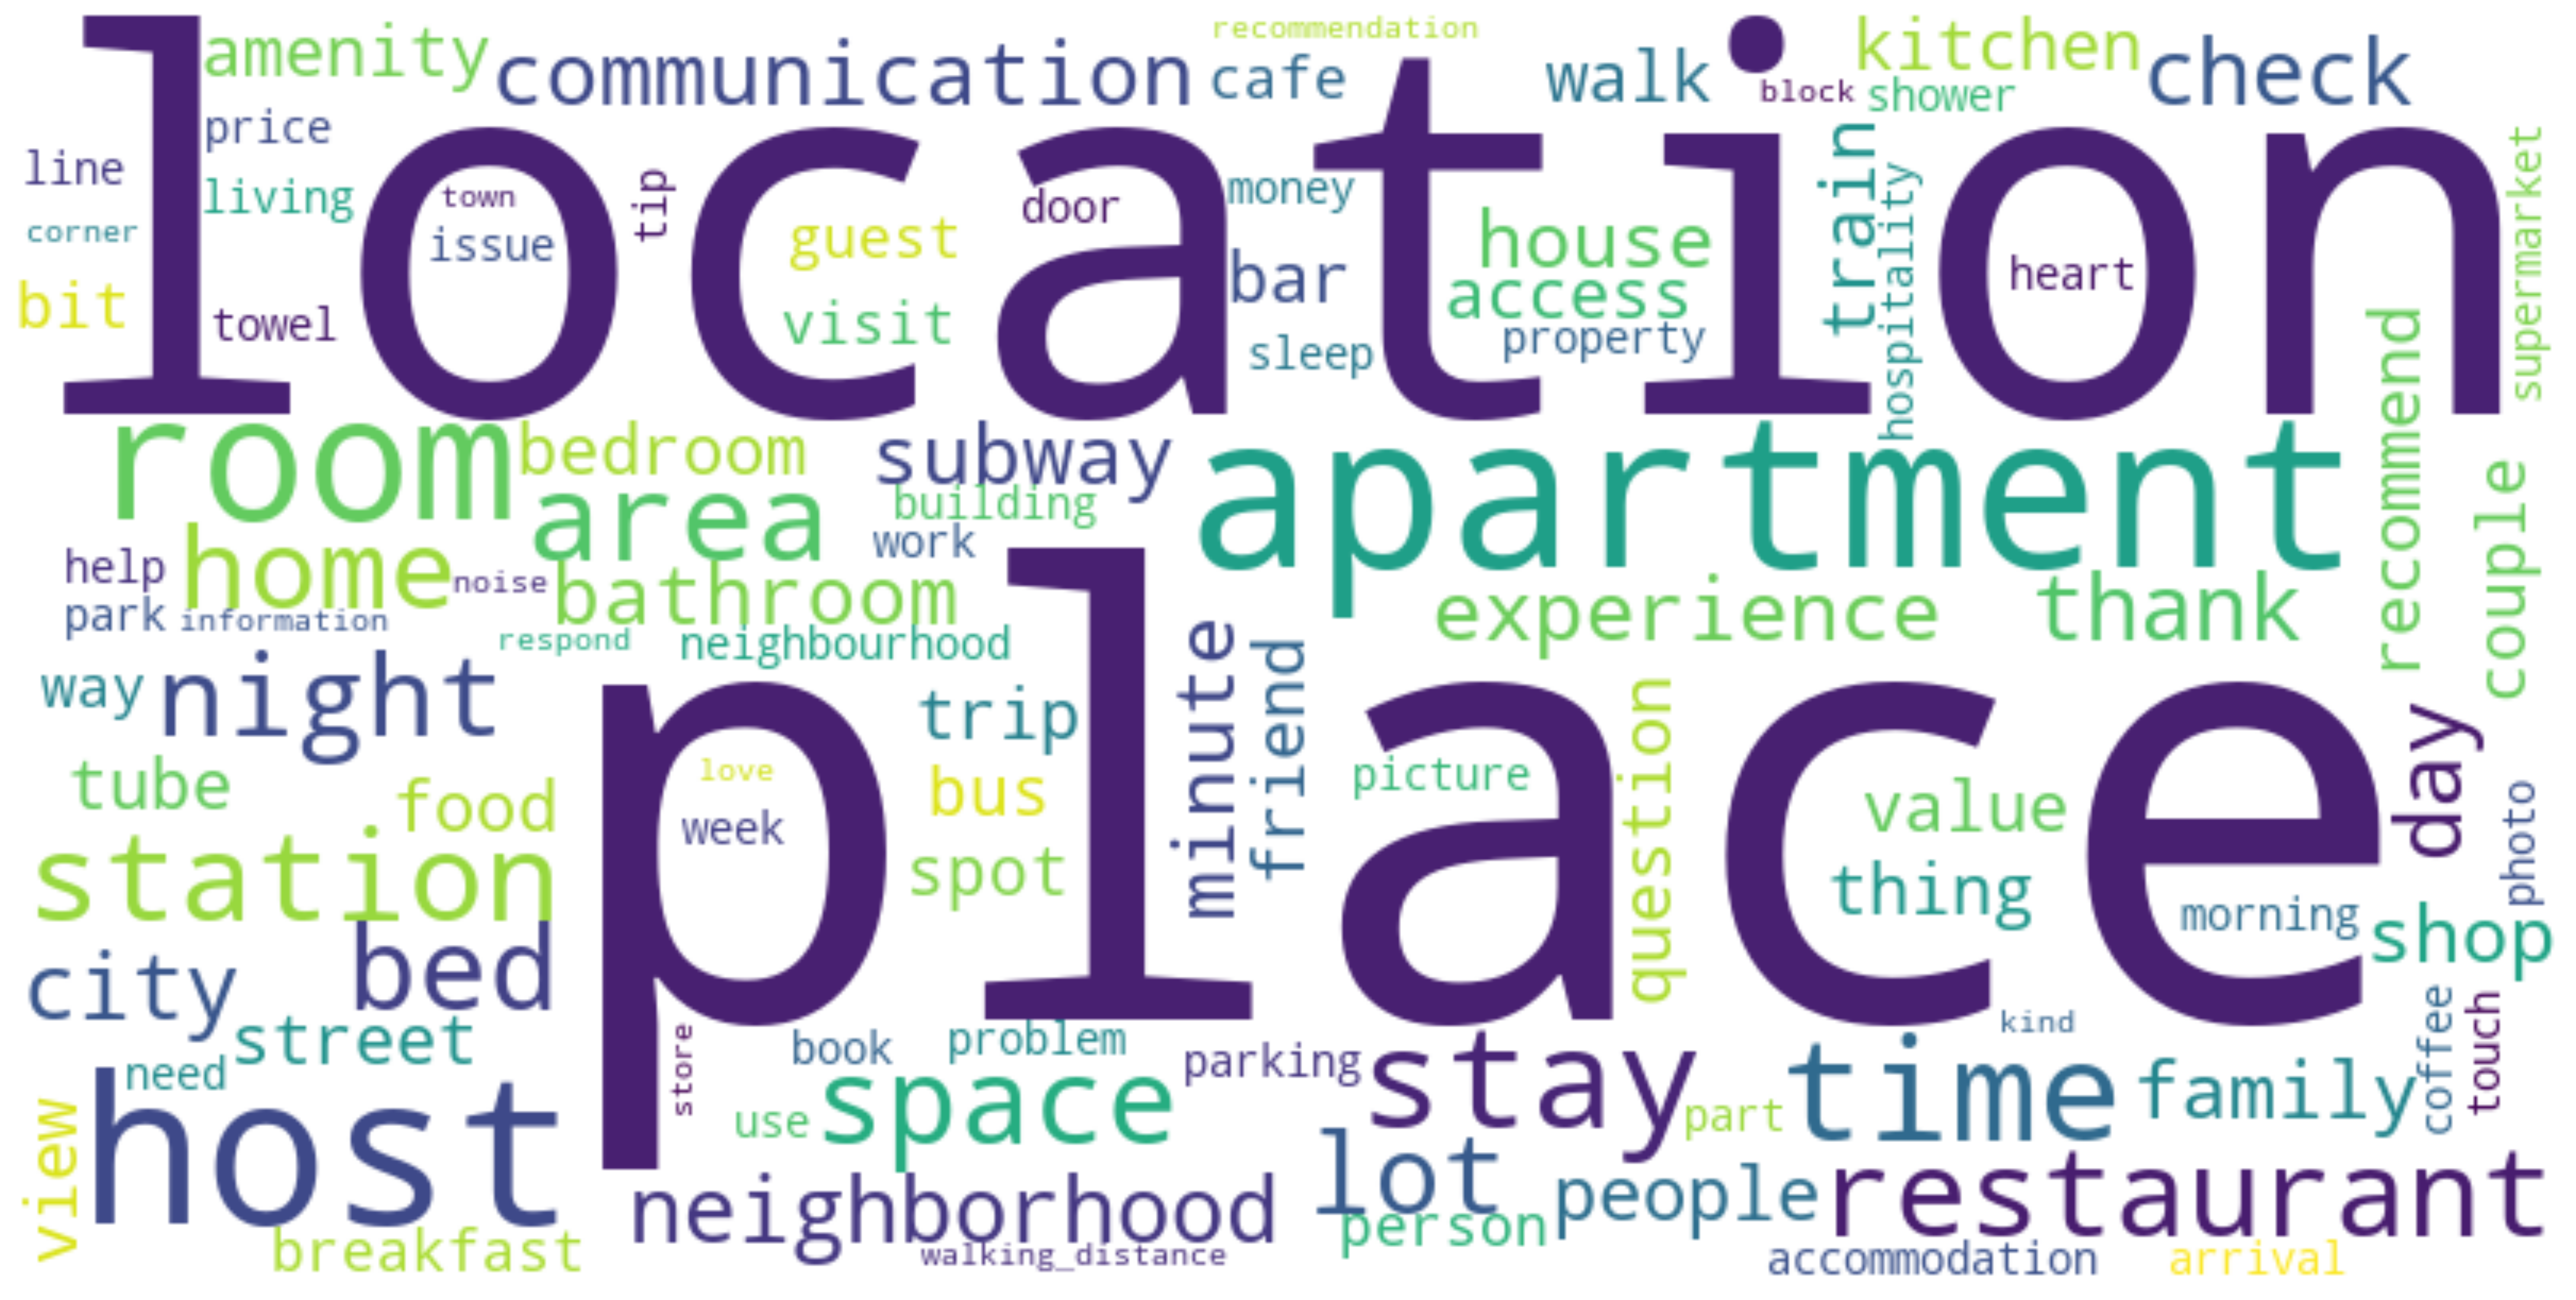

In [143]:
from wordcloud import WordCloud, ImageColorGenerator
    
wordcloud = WordCloud(background_color='white', width=800, height=400,
                      max_words=100,
                      random_state=42).generate_from_frequencies(words_freq)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.tight_layout(pad=0)
plt.show();

In [ ]:
#building bi-grams 

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 

bigram_mod = gensim.models.phrases.Phraser(bigram)

print('done!')



# Removing stop Words

#stop_words.extend(['from', 'rt'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data_words_nostops = remove_stopwords(data_words)


# Form Bigrams
data_words_bigrams = [bigram_mod[doc] for doc in data_words_nostops]


nlp = spacy.load('en', disable=['parser', 'ner'])
#lemmatization
data_lemmatized = []
for sent in data_words_bigrams:
    doc = nlp(" ".join(sent)) 
    data_lemmatized.append([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']])

docs = data_lemmatized
vocab = set(x for doc in docs for x in doc)

# Train a new model 
import random
random.seed(1000)
# Init of the Gibbs Sampling Dirichlet Mixture Model algorithm
mgp = MovieGroupProcess(K=10, alpha=0.1, beta=0.1, n_iters=30)

vocab = set(x for doc in docs for x in doc)
n_terms = len(vocab)
n_docs = len(docs)

# Fit the model on the data given the chosen seeds
y = mgp.fit(docs, n_terms)

def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print('Cluster %s : %s'%(cluster,sort_dicts))
        print(' — — — — — — — — — ')

doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)
print('*'*20)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)
print('*'*20)


# Show the top 10 words in term frequency for each cluster 

top_words(mgp.cluster_word_distribution, top_index, 10)


done!
